In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

c:\Users\amrut\OneDrive\Desktop\Coding\Real_Time_Fraud_Detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\amrut\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [2]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
desc_df = df.describe().copy()

In [10]:
threshold = 1e10
desc_df[desc_df.abs()>threshold] = np.inf
desc_df = desc_df.round(2)

In [11]:
print(desc_df)

            Time         V1         V2         V3         V4         V5  \
count  284807.00  284807.00  284807.00  284807.00  284807.00  284807.00   
mean    94813.86       0.00       0.00      -0.00       0.00       0.00   
std     47488.15       1.96       1.65       1.52       1.42       1.38   
min         0.00     -56.41     -72.72     -48.33      -5.68    -113.74   
25%     54201.50      -0.92      -0.60      -0.89      -0.85      -0.69   
50%     84692.00       0.02       0.07       0.18      -0.02      -0.05   
75%    139320.50       1.32       0.80       1.03       0.74       0.61   
max    172792.00       2.45      22.06       9.38      16.88      34.80   

              V6         V7         V8         V9  ...        V21        V22  \
count  284807.00  284807.00  284807.00  284807.00  ...  284807.00  284807.00   
mean        0.00      -0.00       0.00      -0.00  ...       0.00      -0.00   
std         1.33       1.24       1.19       1.10  ...       0.73       0.73   
min 

The mean of amount is 88 usd, which means most of the transactions are small

In [12]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no missing values

In [13]:
print(df['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


The data is highly imbalanced

<Axes: xlabel='Class', ylabel='count'>

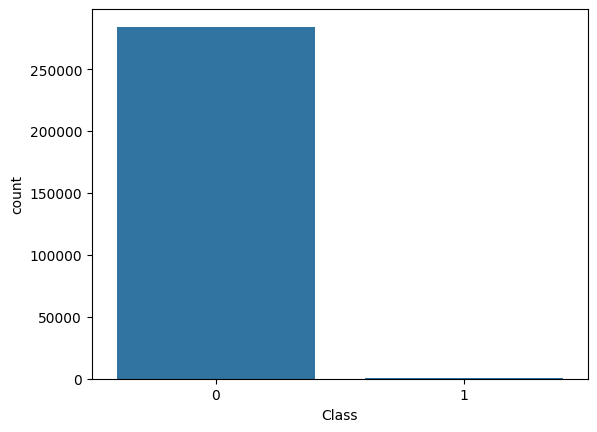

In [14]:
sns.countplot(x='Class', data=df)

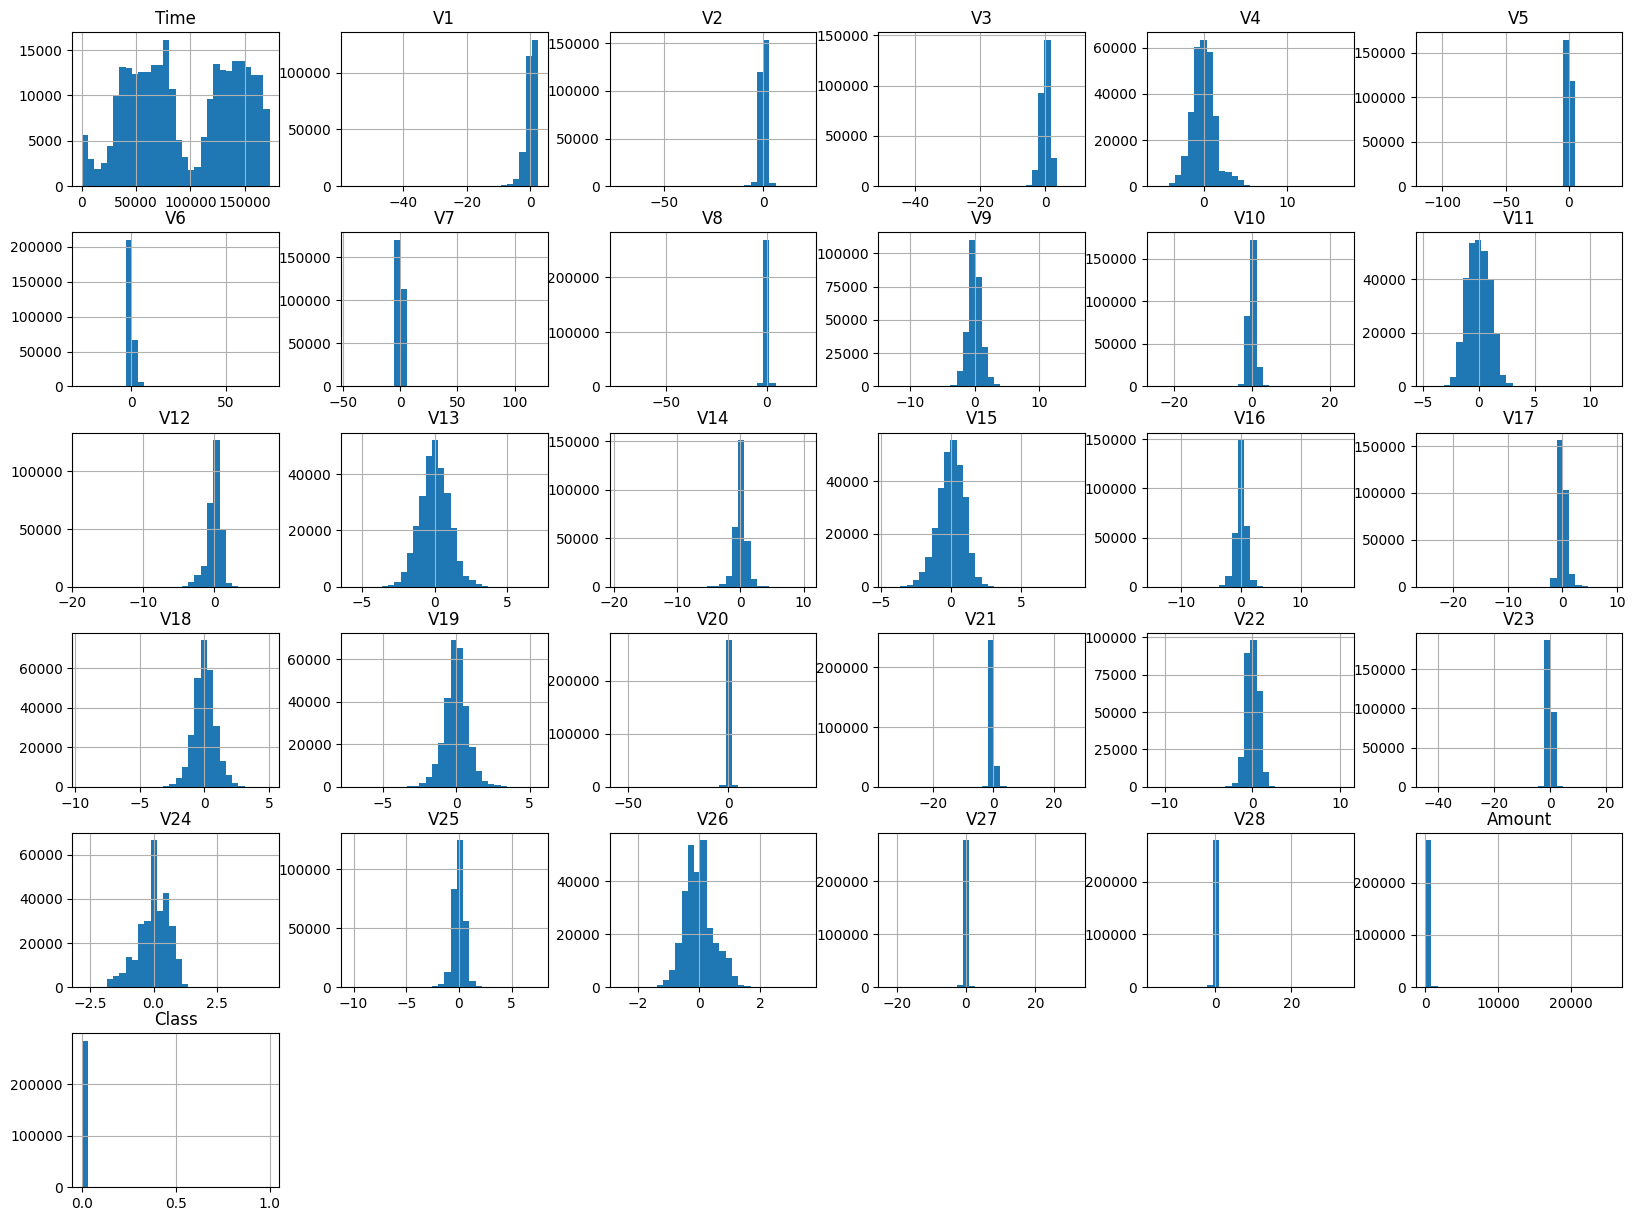

In [15]:
df.hist(figsize=(20, 15), bins=30)
plt.show()

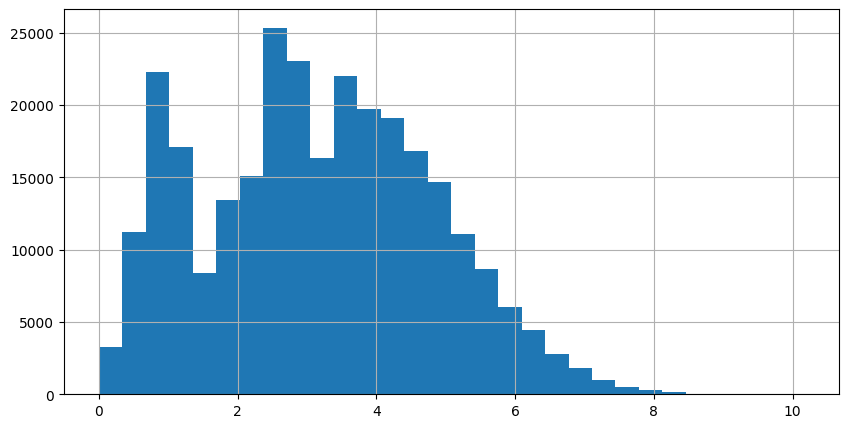

In [16]:
df['LogAmount'] = np.log1p(df['Amount'])  # log(Amount + 1) to handle zero values
df['LogAmount'].hist(figsize=(10, 5), bins=30)
plt.show()

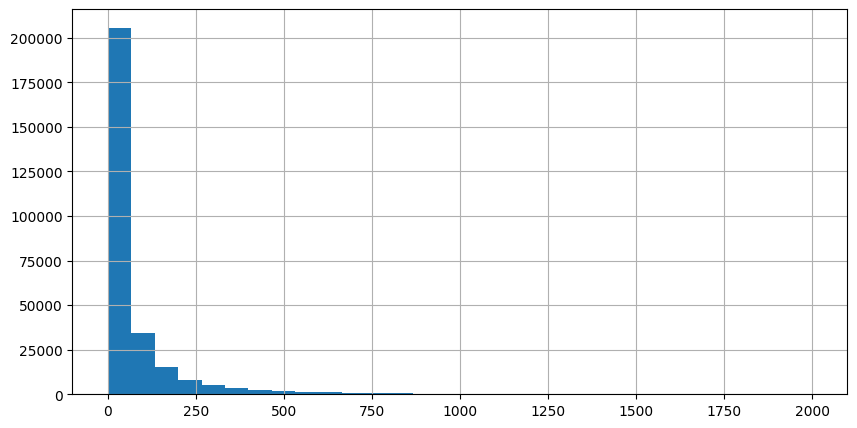

In [17]:
df[df['Amount'] < 2000]['Amount'].hist(figsize=(10, 5), bins=30)
plt.show()

<Axes: >

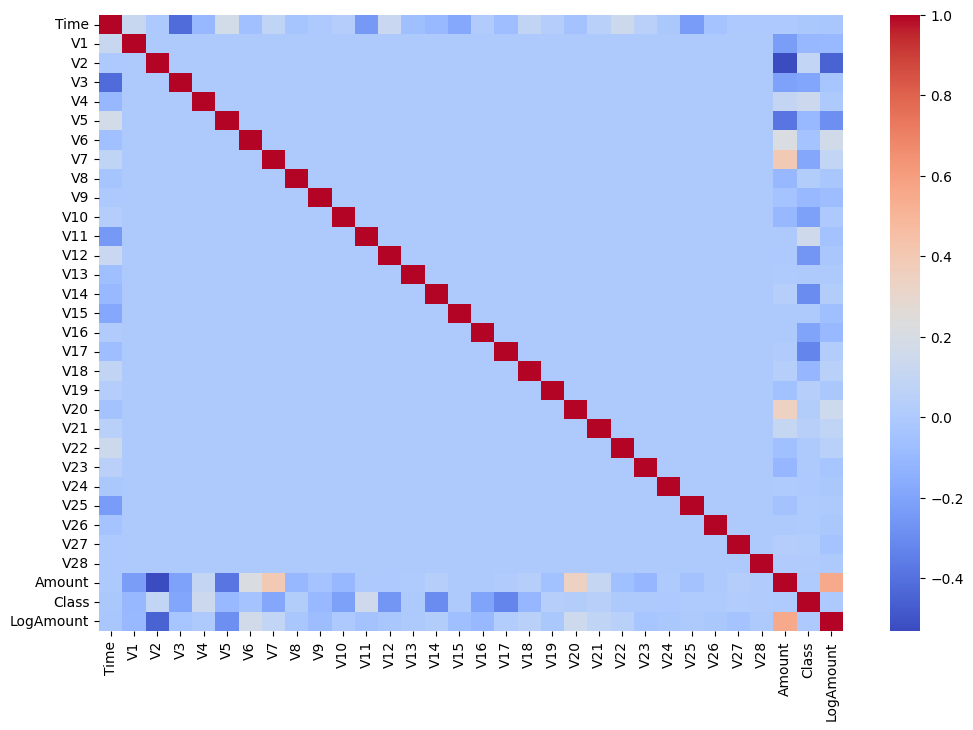

In [18]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)

Let's analyze V2, V5 and V7 more since they are the only ones that stand out in the scatter plot.

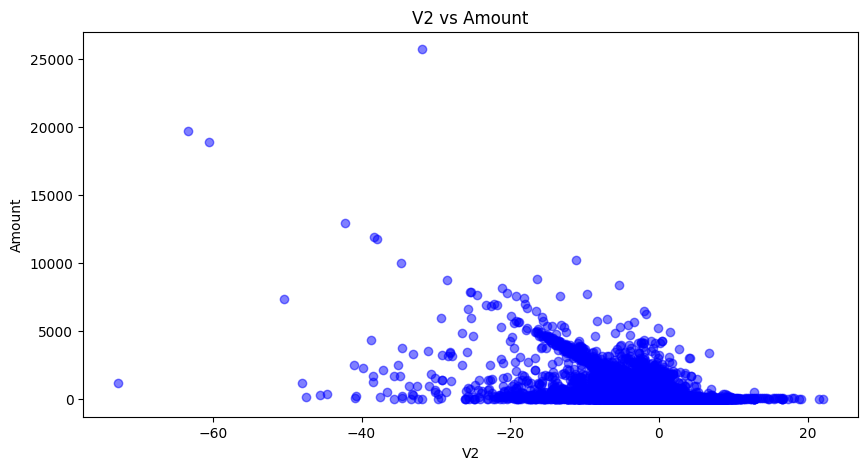

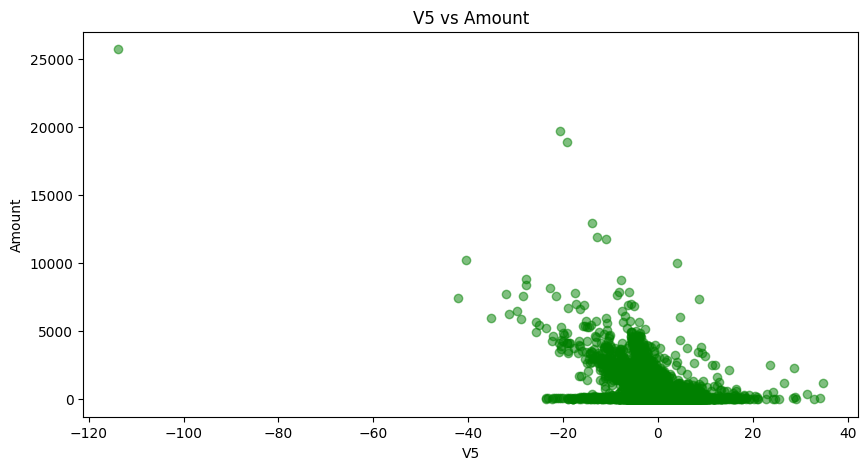

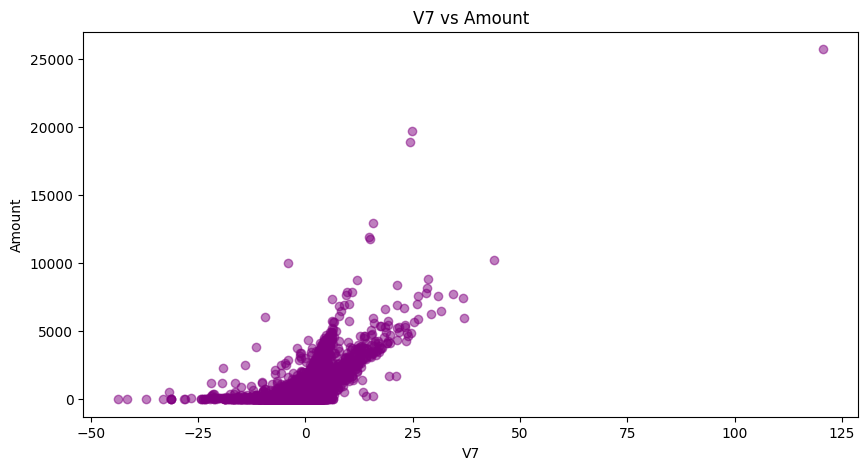

In [19]:
import matplotlib.pyplot as plt

# Scatter Plot for V2 vs Amount
plt.figure(figsize=(10, 5))
plt.scatter(df['V2'], df['Amount'], alpha=0.5, color='blue')
plt.title('V2 vs Amount')
plt.xlabel('V2')
plt.ylabel('Amount')
plt.show()

# Scatter Plot for V5 vs Amount
plt.figure(figsize=(10, 5))
plt.scatter(df['V5'], df['Amount'], alpha=0.5, color='green')
plt.title('V5 vs Amount')
plt.xlabel('V5')
plt.ylabel('Amount')
plt.show()

# Scatter Plot for V7 vs Amount
plt.figure(figsize=(10, 5))
plt.scatter(df['V7'], df['Amount'], alpha=0.5, color='purple')
plt.title('V7 vs Amount')
plt.xlabel('V7')
plt.ylabel('Amount')
plt.show()

Let's see how these scatter plots are different than others

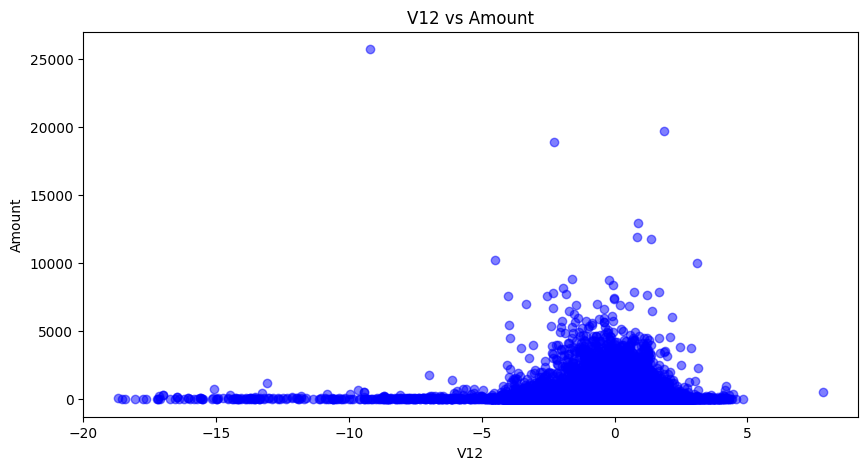

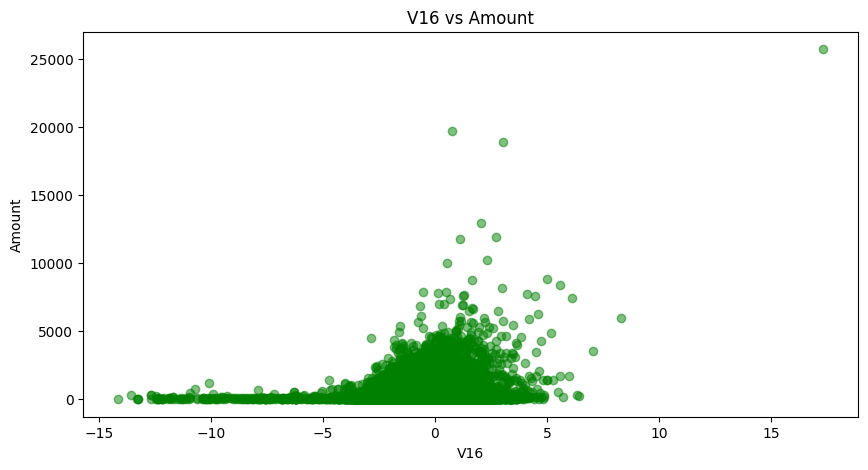

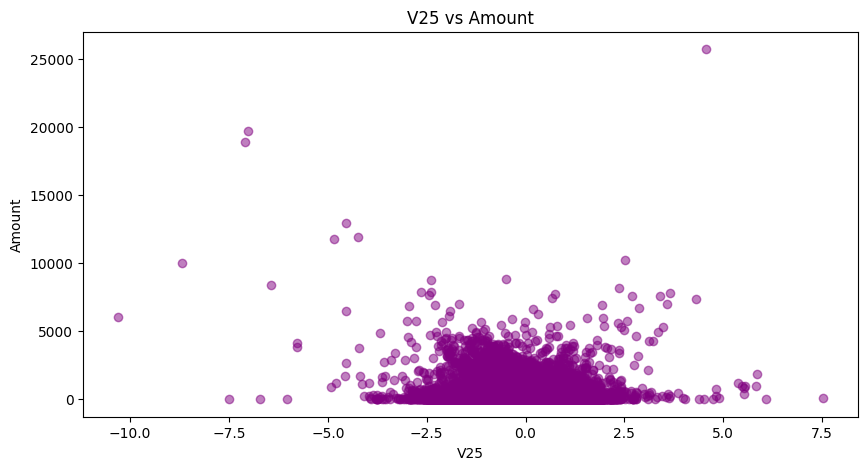

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(df['V12'], df['Amount'], alpha=0.5, color='blue')
plt.title('V12 vs Amount')
plt.xlabel('V12')
plt.ylabel('Amount')
plt.show()

# Scatter Plot for V5 vs Amount
plt.figure(figsize=(10, 5))
plt.scatter(df['V16'], df['Amount'], alpha=0.5, color='green')
plt.title('V16 vs Amount')
plt.xlabel('V16')
plt.ylabel('Amount')
plt.show()

# Scatter Plot for V7 vs Amount
plt.figure(figsize=(10, 5))
plt.scatter(df['V25'], df['Amount'], alpha=0.5, color='purple')
plt.title('V25 vs Amount')
plt.xlabel('V25')
plt.ylabel('Amount')
plt.show()

Since there were some outliers in V2, V5 and V7, we'll look into these outliers and see if they are connected to our output i.e class

The Interquartile Range (IOR) Method to calculate outliers

Okay so, Z-score is mostly useful for normally distributed data

In [21]:
Q1 = df['V2'].quantile(0.25)
Q3 = df['V2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 17.5 * IQR  # Adjusted multiplier
upper_bound = Q3 + 17.5 * IQR

# Flagging the outliers
df['V2_outlier'] = (df['V2'] < lower_bound) | (df['V2'] > upper_bound)

Check if outliers correspond to class=1

In [22]:
fraud_outliers = df[(df['V2_outlier']) & (df['Class'] == 1)]
non_fraud_outliers = df[(df['V2_outlier']) & (df['Class'] == 0)]

print(f"Fraud cases among V2 outliers: {len(fraud_outliers)}")
print(f"Non-fraud cases among V2 outliers: {len(non_fraud_outliers)}")

Fraud cases among V2 outliers: 0
Non-fraud cases among V2 outliers: 73


None of these outliers have class=1

In [23]:
num_outliers = df[df['V2_outlier'] == True].shape[0]
num_non_outliers = df[df['V2_outlier'] == False].shape[0]

print(f"Number of outliers: {num_outliers}")
print(f"Number of non-outliers: {num_non_outliers}")

Number of outliers: 73
Number of non-outliers: 284734


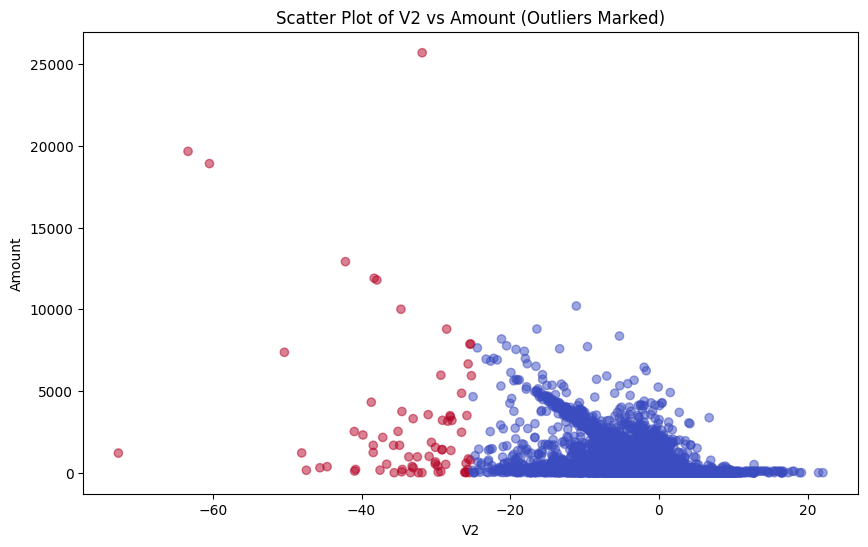

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['V2'], df['Amount'], c=df['V2_outlier'], cmap='coolwarm', marker='o', alpha=0.5)
plt.xlabel('V2')
plt.ylabel('Amount')
plt.title('Scatter Plot of V2 vs Amount (Outliers Marked)')
plt.show()

In [25]:
Q1 = df['V5'].quantile(0.25)
Q3 = df['V5'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 17.5 * IQR  # Adjusted multiplier
upper_bound = Q3 + 17.5 * IQR

# Flagging the outliers
df['V5_outlier'] = (df['V5'] < lower_bound) | (df['V5'] > upper_bound)

In [26]:
fraud_outliers = df[(df['V5_outlier']) & (df['Class'] == 1)]
non_fraud_outliers = df[(df['V5_outlier']) & (df['Class'] == 0)]

print(f"Fraud cases among V5 outliers: {len(fraud_outliers)}")
print(f"Non-fraud cases among V5 outliers: {len(non_fraud_outliers)}")

Fraud cases among V5 outliers: 0
Non-fraud cases among V5 outliers: 31


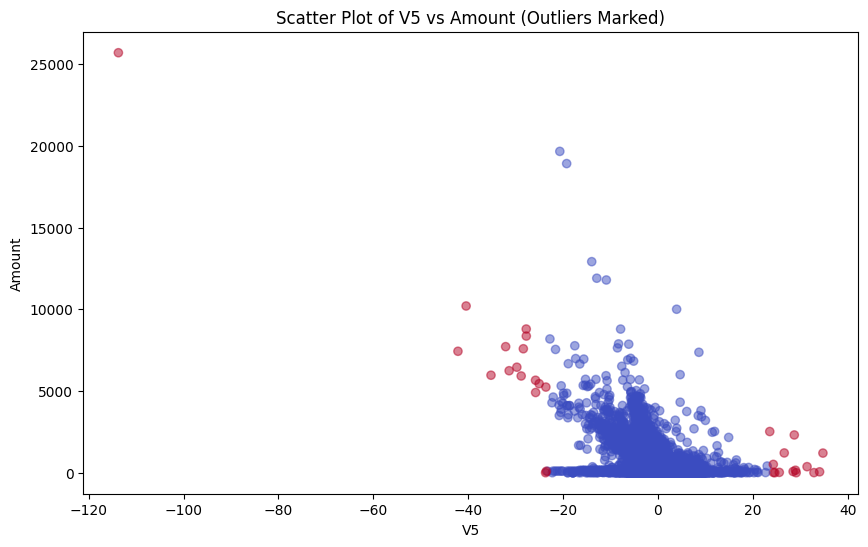

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['V5'], df['Amount'], c=df['V5_outlier'], cmap='coolwarm', marker='o', alpha=0.5)
plt.xlabel('V5')
plt.ylabel('Amount')
plt.title('Scatter Plot of V5 vs Amount (Outliers Marked)')
plt.show()

Okay that was just outliers based on V5.
I'm calculating combined outlier below - based on both V5 and Amount

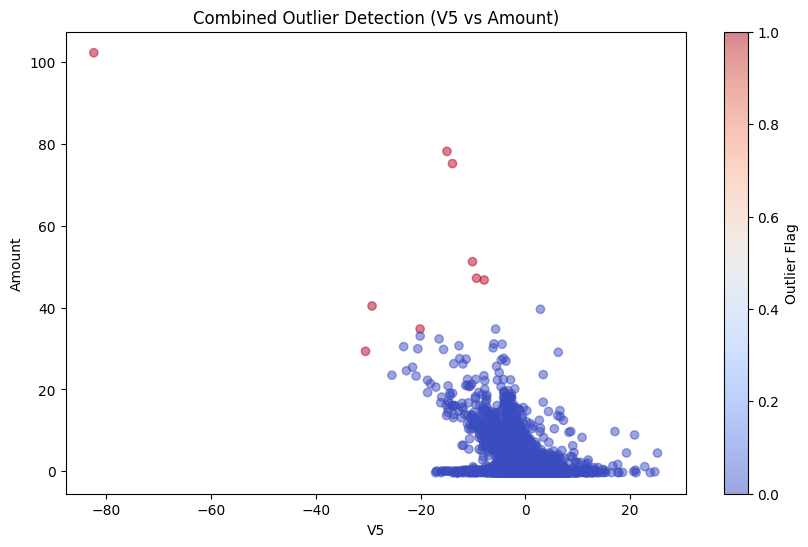

Number of outliers: 9
               V5      Amount
23128  -30.536549   29.349153
46841  -10.103673   51.265782
54018   -9.332256   47.216360
58465  -14.977105   78.235272
74699  -20.107284   34.790988
151296 -13.931646   75.250581
169457  -7.872982   46.783567
274771 -82.408097  102.362243
284249 -29.290268   40.425011


In [28]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'V5' and 'Amount' columns

# Step 1: Standardize the data
df[['V5', 'Amount']] = df[['V5', 'Amount']].apply(zscore)

# Step 2: Calculate Combined Z-score (using Euclidean distance)
df['combined_zscore'] = (df['V5']**2 + df['Amount']**2)**0.5

# Step 3: Flag outliers based on a Z-score threshold (e.g., threshold=3)
threshold = 40
df['outlier_combined'] = df['combined_zscore'] > threshold

# Step 4: Visualize Combined Outliers on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['V5'], df['Amount'], c=df['outlier_combined'], cmap='coolwarm', marker='o', alpha=0.5)
plt.xlabel('V5')
plt.ylabel('Amount')
plt.title('Combined Outlier Detection (V5 vs Amount)')
plt.colorbar(label='Outlier Flag')
plt.show()

# Step 5: Show outliers
outliers = df[df['outlier_combined'] == True]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['V5', 'Amount']])


In [29]:
fraud_outliers = df[(df['outlier_combined']) & (df['Class'] == 1)]
non_fraud_outliers = df[(df['outlier_combined']) & (df['Class'] == 0)]

print(f"Fraud cases among V2 outliers: {len(fraud_outliers)}")
print(f"Non-fraud cases among V2 outliers: {len(non_fraud_outliers)}")

Fraud cases among V2 outliers: 0
Non-fraud cases among V2 outliers: 9


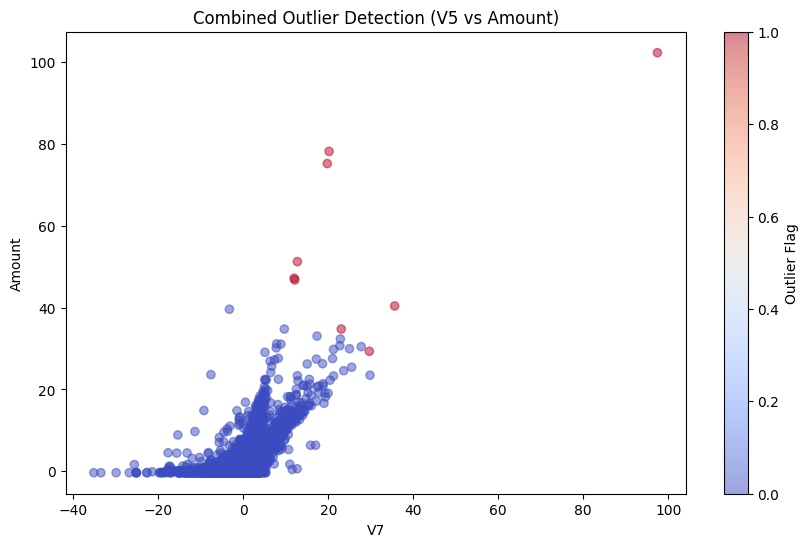

Number of outliers: 10
               V7      Amount
1632    27.728894   30.481731
23128   29.647985   29.349153
46841   12.699663   51.265782
54018   11.951462   47.216360
58465   20.173600   78.235272
74699   23.041195   34.790988
151296  19.742046   75.250581
169457  12.093303   46.783567
274771  97.478239  102.362243
284249  35.611322   40.425011


In [30]:
# Step 1: Standardize the data
df[['V7', 'Amount']] = df[['V7', 'Amount']].apply(zscore)

# Step 2: Calculate Combined Z-score (using Euclidean distance)
df['combined_zscore'] = (df['V7']**2 + df['Amount']**2)**0.5

# Step 3: Flag outliers based on a Z-score threshold (e.g., threshold=3)
threshold = 40
df['V7_outlier_combined'] = df['combined_zscore'] > threshold

# Step 4: Visualize Combined Outliers on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['V7'], df['Amount'], c=df['outlier_combined'], cmap='coolwarm', marker='o', alpha=0.5)
plt.xlabel('V7')
plt.ylabel('Amount')
plt.title('Combined Outlier Detection (V5 vs Amount)')
plt.colorbar(label='Outlier Flag')
plt.show()

# Step 5: Show outliers
outliers = df[df['V7_outlier_combined'] == True]
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['V7', 'Amount']])

In [31]:
len(df[(df['V7_outlier_combined'])])

10

In [32]:
fraud_outliers = df[(df['V7_outlier_combined']) & (df['Class'] == 1)]
non_fraud_outliers = df[(df['V7_outlier_combined']) & (df['Class'] == 0)]

print(f"Fraud cases among V2 outliers: {len(fraud_outliers)}")
print(f"Non-fraud cases among V2 outliers: {len(non_fraud_outliers)}")

Fraud cases among V2 outliers: 0
Non-fraud cases among V2 outliers: 10


In [33]:
print(df['Amount'].skew())

16.977724453761013


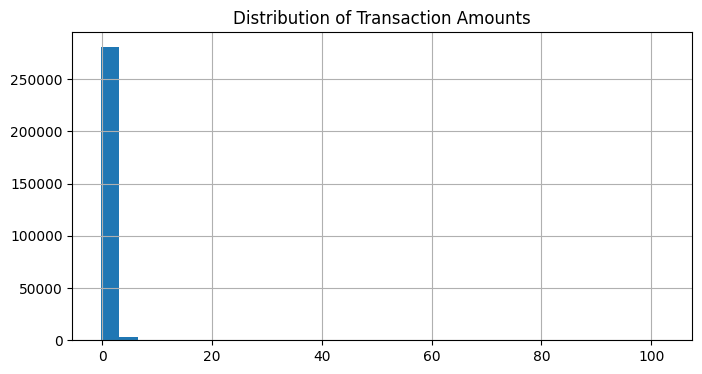

In [34]:
import matplotlib.pyplot as plt
df['Amount'].hist(bins=30, figsize=(8, 4))
plt.title('Distribution of Transaction Amounts')
plt.show()

In [35]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,LogAmount,V2_outlier,V5_outlier,combined_zscore,outlier_combined,V7_outlier_combined
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.245117,0.462388,0.193679,0.098698,0.363787,...,0.133558,-0.021053,0.244964,0,5.014760,False,False,0.312280,False,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.043483,-0.082361,-0.063700,0.085102,-0.255425,...,-0.008983,0.014724,-0.342475,0,1.305626,False,False,0.348348,False,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.364572,1.800499,0.639776,0.247676,-1.514654,...,-0.055353,-0.059752,1.160686,0,5.939276,False,False,1.325332,False,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.007469,1.247203,0.192071,0.377436,-1.387024,...,0.062723,0.061458,0.140534,0,4.824306,False,False,0.237994,False,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.295015,0.095921,0.479302,-0.270533,0.817739,...,0.219422,0.215153,-0.073403,0,4.262539,False,False,0.484890,False,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 284807 non-null  float64
 1   V1                   284807 non-null  float64
 2   V2                   284807 non-null  float64
 3   V3                   284807 non-null  float64
 4   V4                   284807 non-null  float64
 5   V5                   284807 non-null  float64
 6   V6                   284807 non-null  float64
 7   V7                   284807 non-null  float64
 8   V8                   284807 non-null  float64
 9   V9                   284807 non-null  float64
 10  V10                  284807 non-null  float64
 11  V11                  284807 non-null  float64
 12  V12                  284807 non-null  float64
 13  V13                  284807 non-null  float64
 14  V14                  284807 non-null  float64
 15  V15              

In [37]:
df['Time'] = pd.to_datetime(df['Time'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Time                 284807 non-null  datetime64[ns]
 1   V1                   284807 non-null  float64       
 2   V2                   284807 non-null  float64       
 3   V3                   284807 non-null  float64       
 4   V4                   284807 non-null  float64       
 5   V5                   284807 non-null  float64       
 6   V6                   284807 non-null  float64       
 7   V7                   284807 non-null  float64       
 8   V8                   284807 non-null  float64       
 9   V9                   284807 non-null  float64       
 10  V10                  284807 non-null  float64       
 11  V11                  284807 non-null  float64       
 12  V12                  284807 non-null  float64       
 13  V13           

In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,LogAmount,V2_outlier,V5_outlier,combined_zscore,outlier_combined,V7_outlier_combined
0,1970-01-01 00:00:00.000000000,-1.359807,-0.072781,2.536347,1.378155,-0.245117,0.462388,0.193679,0.098698,0.363787,...,0.133558,-0.021053,0.244964,0,5.014760,False,False,0.312280,False,False
1,1970-01-01 00:00:00.000000000,1.191857,0.266151,0.166480,0.448154,0.043483,-0.082361,-0.063700,0.085102,-0.255425,...,-0.008983,0.014724,-0.342475,0,1.305626,False,False,0.348348,False,False
2,1970-01-01 00:00:00.000000001,-1.358354,-1.340163,1.773209,0.379780,-0.364572,1.800499,0.639776,0.247676,-1.514654,...,-0.055353,-0.059752,1.160686,0,5.939276,False,False,1.325332,False,False
3,1970-01-01 00:00:00.000000001,-0.966272,-0.185226,1.792993,-0.863291,-0.007469,1.247203,0.192071,0.377436,-1.387024,...,0.062723,0.061458,0.140534,0,4.824306,False,False,0.237994,False,False
4,1970-01-01 00:00:00.000000002,-1.158233,0.877737,1.548718,0.403034,-0.295015,0.095921,0.479302,-0.270533,0.817739,...,0.219422,0.215153,-0.073403,0,4.262539,False,False,0.484890,False,False


In [40]:
df['Hour'] = df['Time'].dt.hour
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['Month'] = df['Time'].dt.month
df['DayOfMonth'] = df['Time'].dt.day

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,LogAmount,V2_outlier,V5_outlier,combined_zscore,outlier_combined,V7_outlier_combined,Hour,DayOfWeek,Month,DayOfMonth
0,1970-01-01 00:00:00.000000000,-1.359807,-0.072781,2.536347,1.378155,-0.245117,0.462388,0.193679,0.098698,0.363787,...,5.014760,False,False,0.312280,False,False,0,3,1,1
1,1970-01-01 00:00:00.000000000,1.191857,0.266151,0.166480,0.448154,0.043483,-0.082361,-0.063700,0.085102,-0.255425,...,1.305626,False,False,0.348348,False,False,0,3,1,1
2,1970-01-01 00:00:00.000000001,-1.358354,-1.340163,1.773209,0.379780,-0.364572,1.800499,0.639776,0.247676,-1.514654,...,5.939276,False,False,1.325332,False,False,0,3,1,1
3,1970-01-01 00:00:00.000000001,-0.966272,-0.185226,1.792993,-0.863291,-0.007469,1.247203,0.192071,0.377436,-1.387024,...,4.824306,False,False,0.237994,False,False,0,3,1,1
4,1970-01-01 00:00:00.000000002,-1.158233,0.877737,1.548718,0.403034,-0.295015,0.095921,0.479302,-0.270533,0.817739,...,4.262539,False,False,0.484890,False,False,0,3,1,1


In [42]:
df = df.sort_values(by='Time')
df['TimeSinceLastTransaction'] = df['Time'].diff().dt.total_seconds()

In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V2_outlier,V5_outlier,combined_zscore,outlier_combined,V7_outlier_combined,Hour,DayOfWeek,Month,DayOfMonth,TimeSinceLastTransaction
0,1970-01-01 00:00:00.000000000,-1.359807,-0.072781,2.536347,1.378155,-0.245117,0.462388,0.193679,0.098698,0.363787,...,False,False,0.312280,False,False,0,3,1,1,NaN
1,1970-01-01 00:00:00.000000000,1.191857,0.266151,0.166480,0.448154,0.043483,-0.082361,-0.063700,0.085102,-0.255425,...,False,False,0.348348,False,False,0,3,1,1,0.000000e+00
2,1970-01-01 00:00:00.000000001,-1.358354,-1.340163,1.773209,0.379780,-0.364572,1.800499,0.639776,0.247676,-1.514654,...,False,False,1.325332,False,False,0,3,1,1,1.000000e-09
3,1970-01-01 00:00:00.000000001,-0.966272,-0.185226,1.792993,-0.863291,-0.007469,1.247203,0.192071,0.377436,-1.387024,...,False,False,0.237994,False,False,0,3,1,1,0.000000e+00
4,1970-01-01 00:00:00.000000002,-1.158233,0.877737,1.548718,0.403034,-0.295015,0.095921,0.479302,-0.270533,0.817739,...,False,False,0.484890,False,False,0,3,1,1,1.000000e-09


In [44]:
df['Hour'].value_counts()

Hour
0    284807
Name: count, dtype: int64

In [45]:
print(df['Time'].unique()[:10])

<DatetimeArray>
[          '1970-01-01 00:00:00', '1970-01-01 00:00:00.000000001',
 '1970-01-01 00:00:00.000000002', '1970-01-01 00:00:00.000000004',
 '1970-01-01 00:00:00.000000007', '1970-01-01 00:00:00.000000009',
 '1970-01-01 00:00:00.000000010', '1970-01-01 00:00:00.000000011',
 '1970-01-01 00:00:00.000000012', '1970-01-01 00:00:00.000000013']
Length: 10, dtype: datetime64[ns]


In [46]:
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second
df['Millisecond'] = df['Time'].dt.microsecond // 1000

print(df[['Hour', 'Minute', 'Second', 'Millisecond']].nunique())

Hour           1
Minute         1
Second         1
Millisecond    1
dtype: int64


In [47]:
df['Nanosecond'] = df['Time'].dt.nanosecond
print(df[['Nanosecond']].nunique())

Nanosecond    1000
dtype: int64


In [48]:
print(df['Time'].min(), df['Time'].max())

1970-01-01 00:00:00 1970-01-01 00:00:00.000172792


Standardizing Time and Amount since all other features are already PCA-transformed and standardized.

In [49]:
from sklearn.preprocessing import StandardScaler

df['norm_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['norm_Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0 to 284806
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   V1                        284807 non-null  float64
 1   V2                        284807 non-null  float64
 2   V3                        284807 non-null  float64
 3   V4                        284807 non-null  float64
 4   V5                        284807 non-null  float64
 5   V6                        284807 non-null  float64
 6   V7                        284807 non-null  float64
 7   V8                        284807 non-null  float64
 8   V9                        284807 non-null  float64
 9   V10                       284807 non-null  float64
 10  V11                       284807 non-null  float64
 11  V12                       284807 non-null  float64
 12  V13                       284807 non-null  float64
 13  V14                       284807 non-null  float6

In [51]:
df = df.drop(df.columns[29:46], axis=1)

In [52]:
df = df.rename(columns={"norm_title": "norm_Time"})

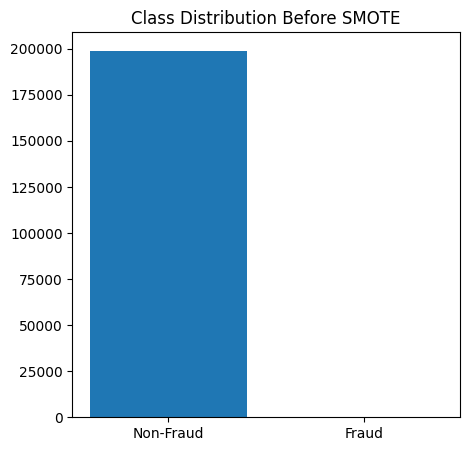

In [53]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop("Class", axis=1)
y = df["Class"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Visualize the class distribution before oversampling
plt.figure(figsize=(5, 5))
plt.bar(["Non-Fraud", "Fraud"], [sum(y_train == 0), sum(y_train == 1)])
plt.title("Class Distribution Before SMOTE")
plt.show()

In [54]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

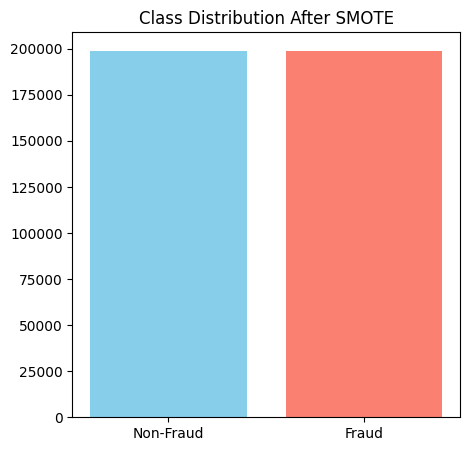

In [55]:
# Visualize the class distribution after oversampling
plt.figure(figsize=(5, 5))
plt.bar(["Non-Fraud", "Fraud"], [sum(y_resampled == 0), sum(y_resampled == 1)], color=["skyblue", "salmon"])
plt.title("Class Distribution After SMOTE")
plt.show()

Let's try Random Forest first

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Train the Random Forest Model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_resampled, y_resampled)

KeyboardInterrupt: 

In [122]:
# # Predict on the test set
# y_pred = model.predict(X_test)

# # Get prediction probabilities for ROC-AUC curve
# y_pred_prob = model.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.78      0.81       148

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



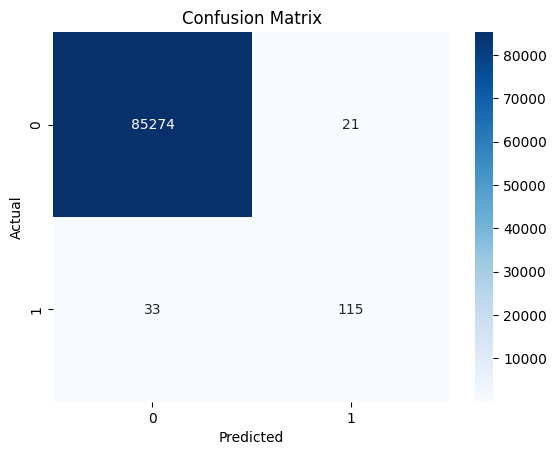

In [123]:
# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix visualization
# conf_matrix = confusion_matrix(y_test, y_pred)
# sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

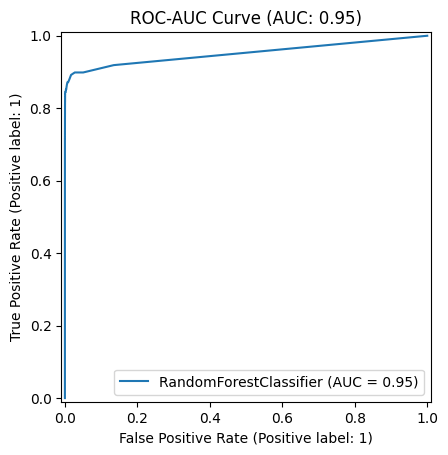

In [124]:
# # Plot ROC curve
# roc_auc = roc_auc_score(y_test, y_pred_prob)
# RocCurveDisplay.from_estimator(model, X_test, y_test)
# plt.title(f"ROC-AUC Curve (AUC: {roc_auc:.2f})")
# plt.show()